## Waste Management using CNN

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

In [36]:
train_path = "TRAIN"
test_path ="TEST"


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


In [43]:
import cv2
import os
import pandas as pd
from glob import glob
from tqdm import tqdm  # Progress bar

train_path = "DATASET\TRAIN"  # Update this with your actual path

x_data = []
y_data = []

for category in glob(os.path.join(train_path, '*')):  # Iterate through category folders
    for file in tqdm(glob(os.path.join(category, '*'))):  # Iterate through image files
        img_array = cv2.imread(file)

        if img_array is None:
            print(f"Warning: Skipping unreadable image {file}")  # Debugging print
            continue  # Skip if image is not loaded

        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        x_data.append(img_array)  # Append valid image
        y_data.append(os.path.basename(category))  # Append label (category name)

# Convert to DataFrame
data = pd.DataFrame({'image': x_data, 'label': y_data})

# Debugging: Check if images are added
print(f"Total images loaded: {len(data)}")
print("DataFrame Preview:\n", data.head())


100%|██████████| 9999/9999 [01:47<00:00, 92.80it/s] 


Total images loaded: 22564
DataFrame Preview:
                                                image label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
1  [[[241, 242, 247], [241, 242, 247], [241, 242,...     O
2  [[[224, 224, 224], [229, 229, 229], [236, 236,...     O
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...     O
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     O


In [44]:
print("Example file:", glob(os.path.join(train_path, '*'))[:5])


Example file: ['DATASET\\TRAIN\\O', 'DATASET\\TRAIN\\R']


In [45]:
from cv2 import cvtColor
x_data =[]
y_data =[]
for category in glob(train_path +'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append((img_array))
        y_data.append(category.split('\\')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [01:37<00:00, 102.89it/s]


In [46]:
data.shape

(22564, 2)

([<matplotlib.patches.Wedge at 0x160dc94e540>,
 [Text(-1.131700724955093, -0.20433665636913256, 'Organic'),
  Text(1.1317007058237096, 0.20433676232660034, 'Recyclable')],
 [Text(-0.6396569314963568, -0.11549463186081406, '55.69%'),
  Text(0.6396569206829663, 0.11549469174981755, '44.31%')])

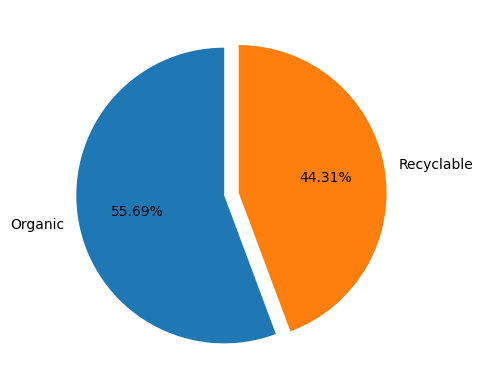

In [47]:
color = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'], autopct='%0.2f%%', startangle = 90, explode=[0.05,0.05])

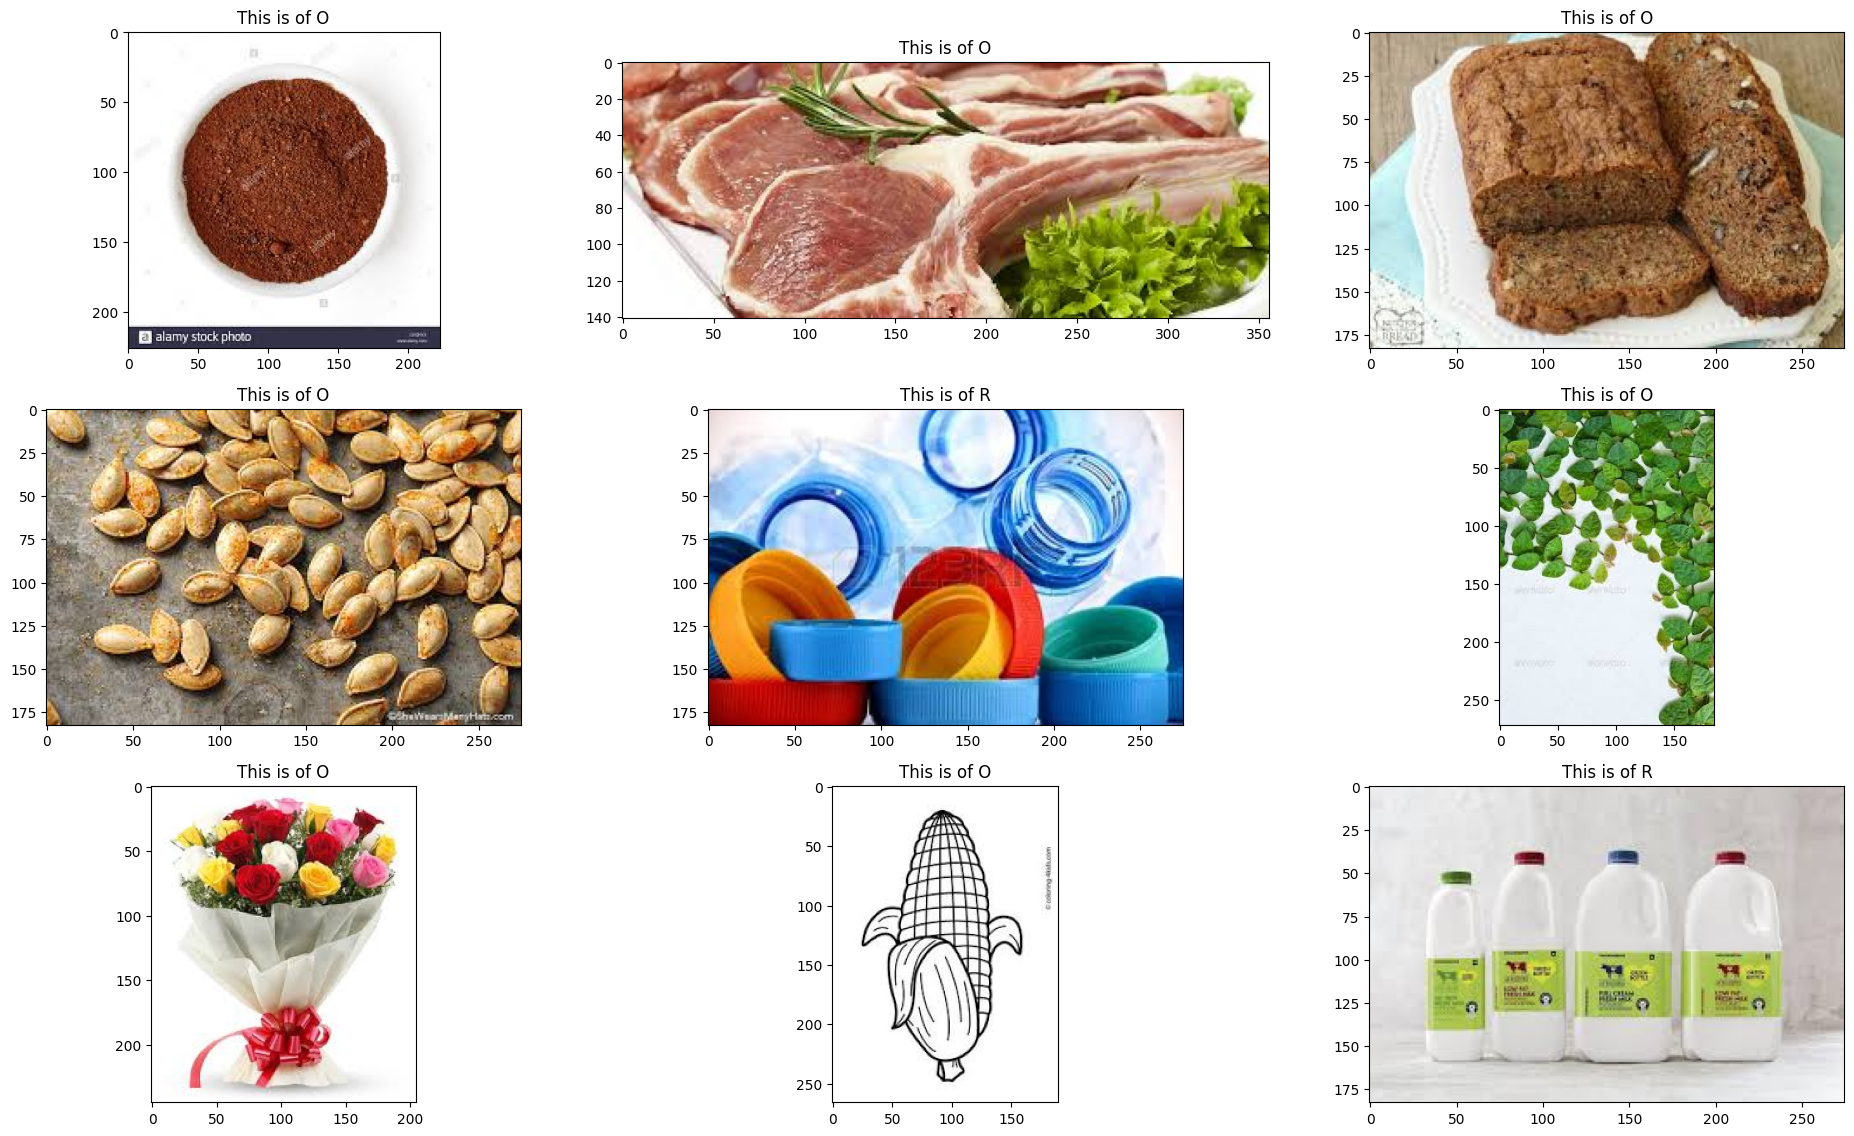

In [48]:
#to train

plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

In [50]:
## CNN Classifications - Convolution neural network

In [51]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics =["accuracy"])
batch_size=256

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
train_datagen= ImageDataGenerator(rescale=1./255)

In [8]:

test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:








# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"
)



Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define dataset paths (UPDATE these with actual paths)
train_path = "DATASET\TRAIN"  # Example: "data/train"
test_path = "DATASET\TEST"    # Example: "data/test"

# Ensure dataset paths exist
if not os.path.exists(train_path) or not os.path.exists(test_path):
    raise FileNotFoundError("Dataset directories not found. Check 'train_path' and 'test_path'.")

# Define batch size
batch_size = 32

# Image Data Generators (Normalizing images)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Detect number of classes automatically
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"  # Use 'binary' if only 2 classes
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical"  # Use 'binary' if only 2 classes
)

# Get number of classes dynamically
num_classes = train_generator.num_classes  # Auto-detect classes

# Define a CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Ensure correct output shape
])

# Select the correct loss function based on class mode
loss_function = 'categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy'

# Compile the model
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])

# Train the model
hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

print("Model training completed successfully!")


<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:9: SyntaxWarning: invalid escape sequence '\T'
<>:8: SyntaxWarning: invalid escape sequence '\T'
<>:9: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Hp\AppData\Local\Temp\ipykernel_8764\962697243.py:8: SyntaxWarning: invalid escape sequence '\T'
  train_path = "DATASET\TRAIN"  # Example: "data/train"
C:\Users\Hp\AppData\Local\Temp\ipykernel_8764\962697243.py:9: SyntaxWarning: invalid escape sequence '\T'
  test_path = "DATASET\TEST"    # Example: "data/test"


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 913s 1s/step - accuracy: 0.7797 - loss: 1.7000 - val_accuracy: 0.8516 - val_loss: 0.4112
Epoch 2/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 830s 1s/step - accuracy: 0.8732 - loss: 0.3158 - val_accuracy: 0.9013 - val_loss: 0.3081
Epoch 3/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 816s 1s/step - accuracy: 0.9215 - loss: 0.2041 - val_accuracy: 0.8512 - val_loss: 0.4572
Epoch 4/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 816s 1s/step - accuracy: 0.9616 - loss: 0.1161 - val_accuracy: 0.8086 - val_loss: 0.6084
Epoch 5/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 819s 1s/step - accuracy: 0.9690 - loss: 0.0967 - val_accuracy: 0.8667 - val_loss: 0.4958
Epoch 6/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 819s 1s/step - accuracy: 0.9800 - loss: 0.0661 - val_accuracy: 0.8703 - val_loss: 0.6846
Epoch 7/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 818s 1s/step - accuracy: 0.9813 - loss: 0.0651 - val_accuracy: 0.8289 - val_loss: 0.7091
Epoch 8/10
706/706 ━━━━━━━━━━━━━━━━━━━━ 818s 1s/step - accuracy: 0.9838 - loss: 0.0569 - val_accu

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Adjust number of classes accordingly
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (Replace train_data and validation_data with actual data)
# model.fit(train_data, epochs=10, validation_data=validation_data)

# Save the model
model.save('plastic_waste_classification_model.keras')


C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:

from tensorflow.keras.models import load_model
model=load_model('plastic_waste_classification_model.keras')

C:\Users\Hp\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
